# jjun879 - ENGSCI205 - Section B (Engineering Machine Learning)
## Lab 2 - PyTorch

Welcome to your second laboratory on Engineering Machine Learning (or knowledge-/physics-informed machine learning...). The laboratory and the material provided in this notebook introduces some basic of working with PyTorch.

We will look at:   
- Loading in an image  
- Putting the image into a PyTorch tensor  
- Rearranging and unfolding image data   
- Optimising a simple function using PyTorch's in-built automatic differentiation and optimisation methods  
- Applying automatic differentiation and optimisation to fit the autoregression model from Lab 1.  

**This roughly follows the lecture notes so check there if in doubt about what to do!**



## Loading images
We can load images with many libraries, including PyTorch. Here, though, we will first use the `imageio` library to load in an image of a cute cat (from the dataset associated with the book [*'Deep Learning with PyTorch'*](https://github.com/deep-learning-with-pytorch/dlwpt-code) referenced above) as a NumPy array.

**You should first download the image 'cat3.png' from Canvas and load it into Goolge colab by clicking the folder icon on the side menu then clicking the upload to session storage icon and choosing the image.**

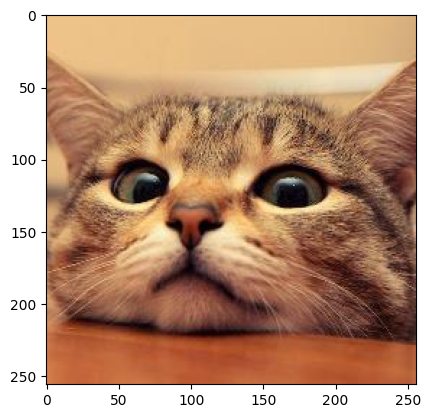

image array shape:
(256, 256, 3)


In [17]:
# import libraries for handling images as NumPy arrays
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
img_arr = iio.imread('/content/cat3.png')

plt.figure()
plt.imshow(img_arr)
plt.show()

print('image array shape:')
print(img_arr.shape)

Now we will convert it to a PyTorch tensor

In [18]:
import torch
img_tensor = torch.from_numpy(img_arr)
img_tensor = img_tensor.float()/255 # ensure float32 dtype

Now **your task** is to rearrange this to standard (colour channel, pixels, pixels) format and show it is the right shape

In [19]:
# ANSWER
cat = np.transpose(img_tensor, (2,0,1))

print('Tensor shape (size):')
print(cat.shape)

Tensor shape (size):
torch.Size([3, 256, 256])


Now **your task** is to extract the Red channel array from the RGB (Red, Green Blue) format and display its size

In [20]:
cat_red = cat[0,:,:] # ANSWER
print('Tensor slice shape (size):')
print(cat_red.shape)

Tensor slice shape (size):
torch.Size([256, 256])


Now **your task** is to verify that the cat and cat_red tensors are views of the same memory location (see lecture handout!)

In [21]:
# ANSWER
print(cat.storage().data_ptr())
print(cat_red.storage().data_ptr())

101754165478464
101754165478464


## Unfolding and creating patches

Now let's split our cat picture into *non-overlapping patches*, setting `step = size`, and plot our patched cat!

**Your task** is to created a 'patched cat', as in the lecture notes, but now use a patch size of 61 by 61!

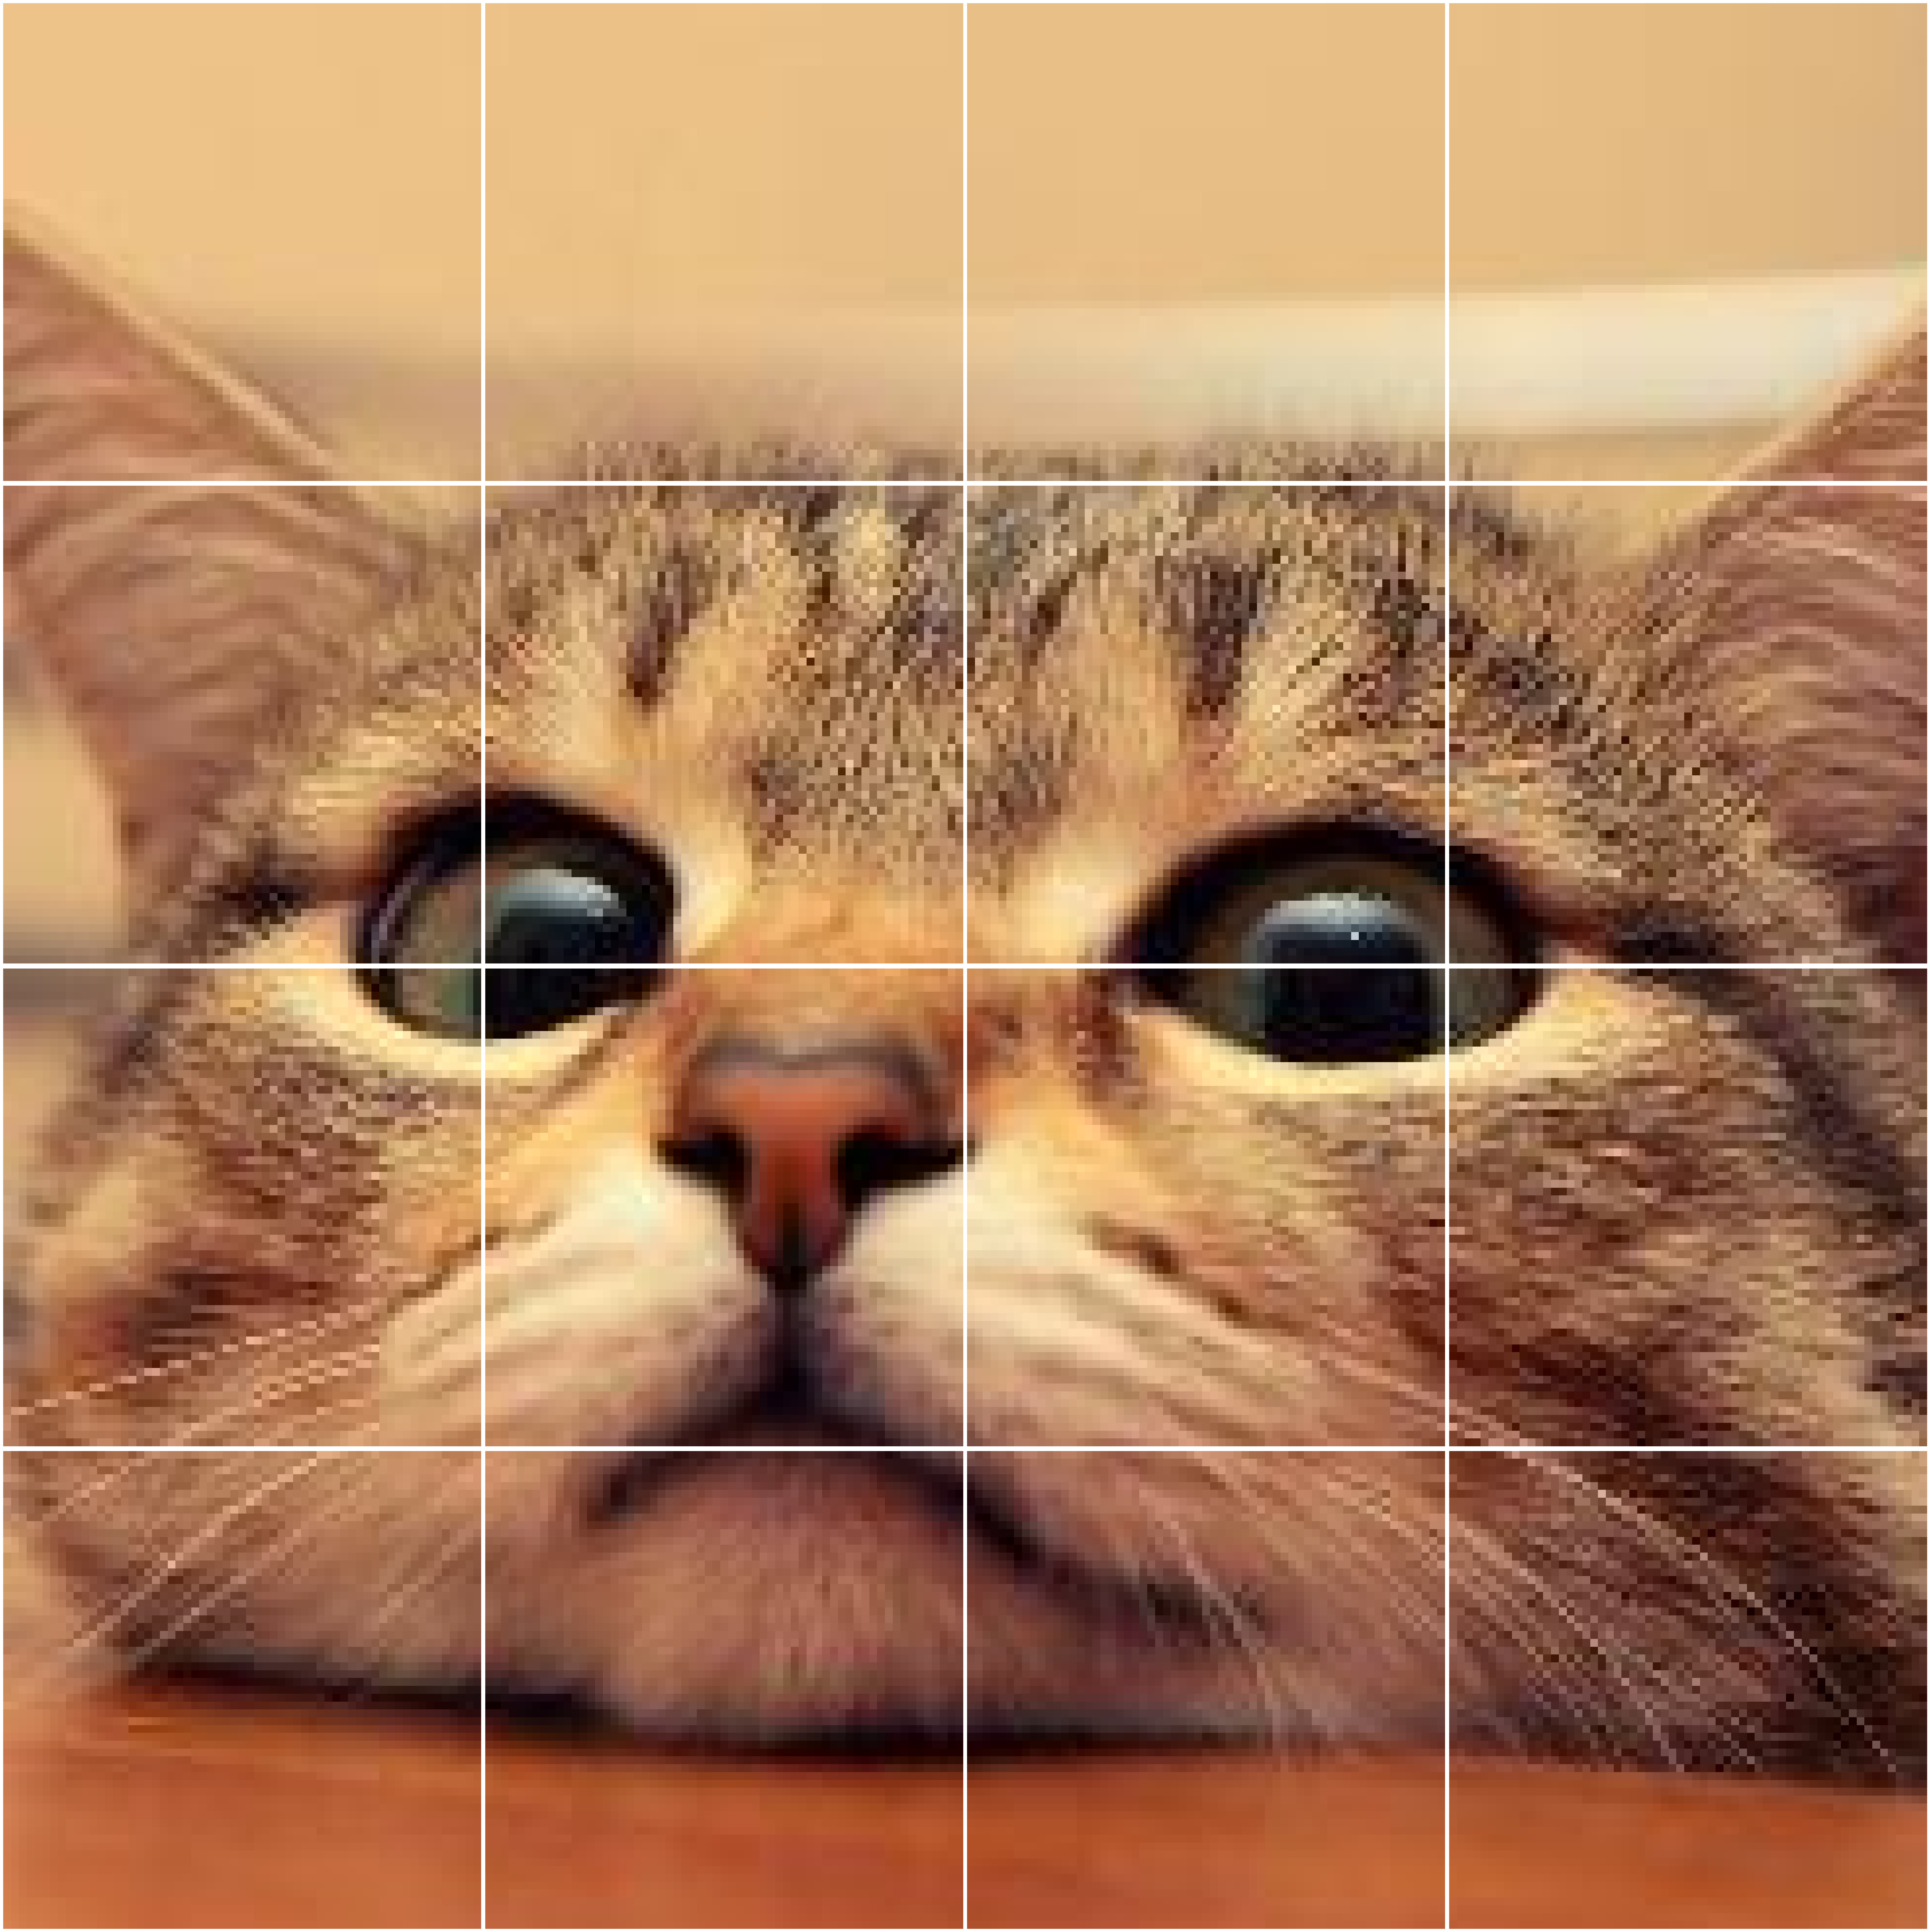

In [22]:
patch_size = 61
# ANSWER
patches = cat.unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size)

patches = patches.permute(1,2,3,4,0)

num_patches_y, num_patches_x = patches.shape[:2]


# Initialize a plot
fig, axes = plt.subplots(num_patches_x, num_patches_y, figsize=(patch_size, patch_size))

# Plot each patch
for i in range(num_patches_x):
    for j in range(num_patches_y):
        patch = patches[i, j]
        axes[i, j].imshow(patch)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Now, let's *zero pad* around the edges of the image, which is commonly used to ensure potentially *overlapping* windows can fit at *each pixel*. However, for simplicitly, let's zero pad but use non-overlapping windows so we don't have to try visualise 256*256 = 65536 windows!

PyTorch has a special function `pad` for this in the `torch.nn.functional` module.

**Your task** is to pad the image by 30 pixels in each direction and then make cat patches of size 61-by-61. Again, see lecture handout for hints!

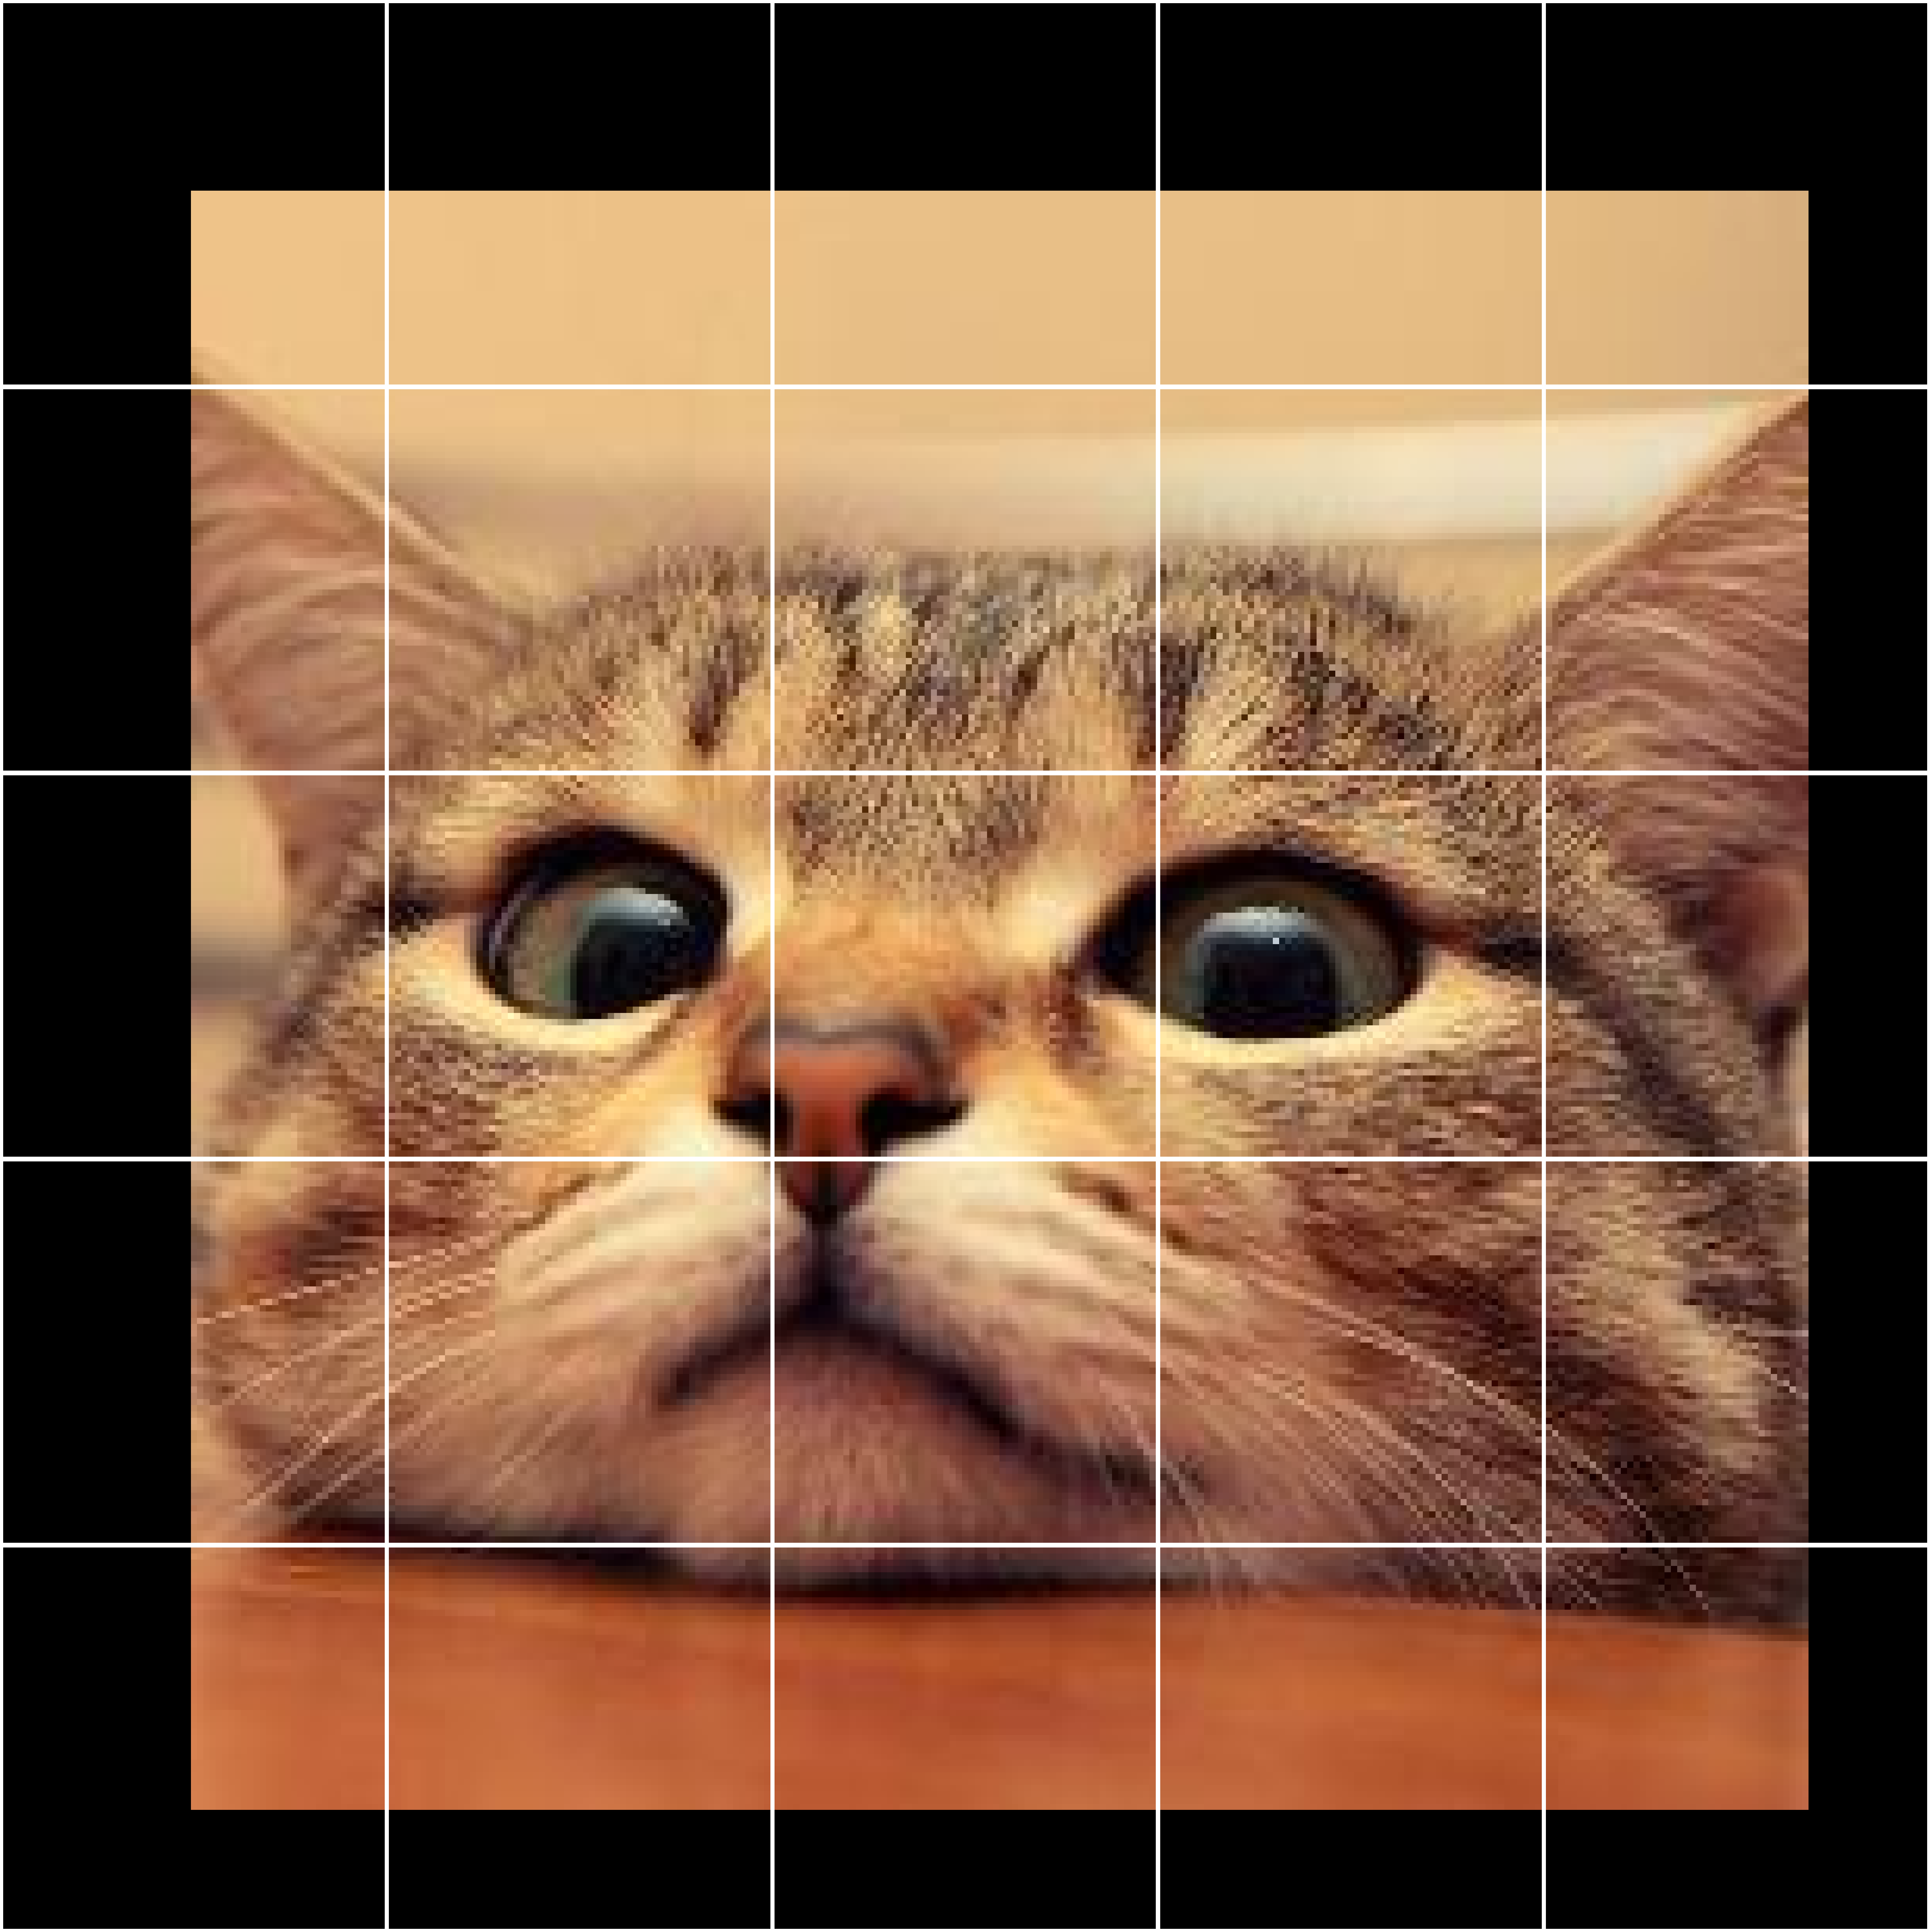

In [23]:
# ANSWER
import torch.nn.functional as F
patch_size = 61
padding = 30

padded_cat = F.pad(cat, pad=(30, 30, 30, 30), mode='constant', value=0)

patches = padded_cat.unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size)
patches = patches.permute(1,2,3,4,0)

num_patches_x, num_patches_y = patches.shape[:2]


# Initialize a plot
fig, axes = plt.subplots(num_patches_x, num_patches_y,
                        figsize=(61, 61))

# Plot each patch
for i in range(num_patches_x):
    for j in range(num_patches_y):
        patch = patches[i, j]
        axes[i, j].imshow(patch)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

## Optimisation

Here we will use PyTorch as a simple optimiser of tensor functions rather than a neural network as such.

### First optimisation problem

Following the lecture notes, **your task** is to extend the example of minimising $(x - 10)^2$ in the single variable $x$ to minimising the function $(x - 10)^2 + (y-20)^2$ in both $x$ and $y$. Hints: it all works pretty much the same! You need to introduce $y$ as well, make the function depend on $y$ as well, and make sure the optimiser updates $y$ as well!

In [24]:
# Define the tensor variable to optimise and
# keep track of gradients of anything that depends on it.
# ANSWER
x = torch.tensor([0.0], requires_grad = True)
y = torch.tensor([0.0], requires_grad = True)

# Define the optimizer. Only requires param not loss.
# Stochastic Gradient Descent with learning rate 0.1
# ANSWER
optimizer = torch.optim.SGD([x, y], lr=0.1)

# Define the function to minimize
def func(x,y):
    # ANSWER
    return (x - 10)**2 + (y - 20)**2

# Optimization loop. Take 30 steps
for i in range(30):
    # ANSWER
    optimizer.zero_grad()
    loss = func(x, y)
    loss.backward()
    optimizer.step()

    print(f'Step {i}: x = {x.item()}, y = {y.item()}, loss = {loss.item()}')

# Final result
print(f'Optimized x,y: {x.item()},{y.item()}')

Step 0: x = 2.0, y = 4.0, loss = 500.0
Step 1: x = 3.5999999046325684, y = 7.199999809265137, loss = 320.0
Step 2: x = 4.880000114440918, y = 9.760000228881836, loss = 204.80001831054688
Step 3: x = 5.904000282287598, y = 11.808000564575195, loss = 131.07199096679688
Step 4: x = 6.72320032119751, y = 13.44640064239502, loss = 83.88607025146484
Step 5: x = 7.3785600662231445, y = 14.757120132446289, loss = 53.68708038330078
Step 6: x = 7.902848243713379, y = 15.805696487426758, loss = 34.359737396240234
Step 7: x = 8.32227897644043, y = 16.64455795288086, loss = 21.99022674560547
Step 8: x = 8.65782356262207, y = 17.31564712524414, loss = 14.073739051818848
Step 9: x = 8.92625904083252, y = 17.85251808166504, loss = 9.007187843322754
Step 10: x = 9.141007423400879, y = 18.282014846801758, loss = 5.764598369598389
Step 11: x = 9.312806129455566, y = 18.625612258911133, loss = 3.6893413066864014
Step 12: x = 9.450244903564453, y = 18.900489807128906, loss = 2.3611769676208496
Step 13: x =

### Least squares

Now, let's modify the above to solve the least squares problem $\min_{a,b}\ (y - (ax + b))^2$ for **given data** $x$ and $y$ and **parameters to optimise** $a, b$. Note $x$ and $y$ are now given!

**Your task** is to complete the code below and determine the best $a$ and $b$ parameters.

In [25]:
import torch

# Example data (x, y pairs)
x_data = torch.tensor([1.0, 2.0, 3.0, 4.0])  # Input data (x values)
y_data = torch.tensor([2.0, 4.0, 6.0, 8.0])  # Output data (y values)

# Initialize parameters (slope and intercept) to be optimized
# ANSWER
a = torch.tensor([0.0], requires_grad = True) # ANSWER
b = torch.tensor([0.0], requires_grad = True) # ANSWER

# Define the optimizer
optimizer = torch.optim.SGD([a,b], lr=0.1) # ANSWER

# Define the function to minimize (Mean Squared Error for linear regression)
def func(x_data,y_data,a,b): # ANSWER
    # Compute predictions: y_pred = a*x_data + b
    y_pred = a * x_data + b
    # Compute the Mean Squared Error loss
    return torch.mean((y_pred - y_data) ** 2)

# Optimization loop. Take 100 steps
for i in range(100):
    # ANSWER
    optimizer.zero_grad()
    loss = func(x_data, y_data, a, b)
    loss.backward()
    optimizer.step()

    print(f'Step {i}: a = {a.item()}, b = {b.item()}, loss = {loss.item()}')

# Final result
print(f'Optimized a, b: {a.item()}, {b.item()}')


Step 0: a = 3.0, b = 1.0, loss = 30.0
Step 1: a = 1.0, b = 0.29999998211860657, loss = 13.5
Step 2: a = 2.3499999046325684, b = 0.7400000095367432, loss = 6.089999675750732
Step 3: a = 1.4550000429153442, b = 0.41700005531311035, loss = 2.7613489627838135
Step 4: a = 2.063999891281128, b = 0.6060999631881714, loss = 1.2652506828308105
Step 5: a = 1.6649500131607056, b = 0.45288002490997314, loss = 0.5920287370681763
Step 6: a = 1.9410849809646606, b = 0.5298290252685547, loss = 0.288351833820343
Step 7: a = 1.764543056488037, b = 0.45332077145576477, loss = 0.15067657828330994
Step 8: a = 1.8910679817199707, b = 0.48038506507873535, loss = 0.08761181682348251
Step 9: a = 1.814273476600647, b = 0.43877407908439636, loss = 0.058119598776102066
Step 10: a = 1.873476266860962, b = 0.4438825249671936, loss = 0.04377029836177826
Step 11: a = 1.8413206338882446, b = 0.4183678925037384, loss = 0.03628523275256157
Step 12: a = 1.870155692100525, b = 0.414033979177475, loss = 0.03194351494312286